# **using accurtae into weights** 

In [1]:
from numpy.random import choice
import copy 
from tqdm import tqdm
import matplotlib.pyplot as plt
from datetime import datetime
import time
import timeit
import numpy as np 
import matplotlib.patches as mpatches
import json
from sklearn.linear_model import LinearRegression
import pandas as pd

In [2]:
def base_to_mutate(DNA, current_weights, indices): 
    """
    (DNA: str, weights: Dict) -> int
    
    Will return the index of a random choice of a base that will be mutated based on probabilities given by the
    weights dictionary (i.e. the model)
    ex. "ATCGTA" --> index 3 ("G") will mutate
    """

    # NORMALIZE THE POPULATION OF WEIGHTS    
    total_freq = sum(current_weights) - current_weights[0] - current_weights[-1] # remove the start and end weight
    normalized_weights = ["error"]*len(current_weights)
    for index, value in enumerate(current_weights):
        normalized_weights[index] = value/total_freq 
    
    normalized_weights[0] = 0
    normalized_weights[-1] = 0
    # DRAW THE INDEX OF THE BASE THAT WILL BE MUTATED
    base_index = choice(indices, p=normalized_weights) 
    

    # RETURN THE INDEX
    return base_index  




## ** now it has the accurate into base prob, not random ** 

In [ ]:
#informing the graph 
sim_details = ""

#making the dna ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
dna_length = 100000
DNA  = choice(["A", "T", "C", "G"], size = dna_length)
DNA = "".join(DNA)
DNA_initial = copy.copy(DNA)
sim_details += str(dna_length/1000000) + "MB random seq \n "

#triplets
triplets = []
for i_1 in ["A", "T", "G", "C"]: 
    for i_2 in ["A", "T", "G", "C"]: 
        for i_3 in ["A", "T", "G", "C"]: 
            triplets.append(i_1+i_2+i_3)
        
#mutability model 
model = json.load(open("../Human_mutability_model/Model_2020_12_02_genomeWide.txt"))
#triplet-count dict 
triplet_chosen_count_dict = {}
triplet_into_count_dict = {}
for triplet in triplets: 
    triplet_chosen_count_dict[triplet] = [0,0,0]  
    triplet_into_count_dict[triplet] = [0,0,0]

#making the weights 
current_weights = []
for i in range(1,len(DNA)-1): 
    triplet = DNA[i-1:i+2]
    current_weights.append(model[triplet][0])

indices = [i for i in range(1, len(DNA)-1)]
mut_indices = []

#choosing number of muts 
prop_muts = 0.1
sim_details += str(prop_muts)+"X prop muts \n"


# DESCRIBE THE SIMULATION PLEASE GOD ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~!!!!!!!!!!
sim_details = "random onto triplet,  overlapping" + sim_details

#runnign the sim ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
for i in tqdm(range(int(len(DNA)*prop_muts))):
#     s0 = time.time()
    base_index = base_to_mutate(DNA, current_weights, indices)
    
#     s1 = time.time()
#     t1 = time.time() - s0
    
#     curr_index = indices.index(base_index)
#     current_weights = current_weights[0:curr_index -2]+current_weights[curr_index+3:]
    
    mut_indices.append(base_index)
#     s2 = time.time()
#     t2 = time.time() - s1
    #adding the count for "chosen to mutate" in coutns dict 
    c_triplet = DNA[base_index-1: base_index+2]
    c_triplet_left = DNA[base_index-2: base_index+1]
    c_triplet_right = DNA[base_index: base_index+3]
#     s3 = time.time()
#     t3 = time.time() - s2
    
    triplet_chosen_count_dict[c_triplet_left][0] += 1
    triplet_chosen_count_dict[c_triplet][1] += 1
    triplet_chosen_count_dict[c_triplet_right][2] += 1
    
    
    #accurate model INTO probability ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~OR ^ 
    curr_into_bases = []
    curr_into_bases_probs = []
    for into_base, prob in model[c_triplet][1].items(): 
        curr_into_bases.append(into_base)
        curr_into_bases_probs.append(prob)
    mb =  choice(curr_into_bases, p = curr_into_bases_probs)[1]

    #adding the count for "mutated into thiss" in the triplet dict 
    m_triplet = c_triplet[0]+mb+c_triplet[2]
    m_triplet_left = c_triplet_left[0:2]+mb
    m_triplet_right = mb+c_triplet_right[1:3]
    
    triplet_into_count_dict[m_triplet_left][0] += 1 
    triplet_into_count_dict[m_triplet][1] += 1 
    triplet_into_count_dict[m_triplet_right][2] += 1 
#     s6 = time.time()
#     t6 = time.time() - s5
    
    #chanaging the dna 
    DNA = DNA[:base_index]+mb+DNA[base_index+1:]
#     s7 = time.time()
#     t7 = time.time() - s6

    current_weights[base_index-2]= model[m_triplet_left][0]    
    current_weights[base_index-1]= model[m_triplet][0]
    current_weights[base_index] = model[m_triplet_right][0]
    



  0%|          | 75/600000 [00:01<3:56:38, 42.25it/s]

## ** plotting ** 

In [69]:
triplet_chosen_left = []
triplet_chosen_centre = []
triplet_chosen_right = []
triplet_chosen_mean = []
triplet_into_left = []
triplet_into_centre = []
triplet_into_right = []
triplet_into_mean = []

muts = []
for triplet in triplets: 
    triplet_chosen_left.append(triplet_chosen_count_dict[triplet][0])
    triplet_chosen_centre.append(triplet_chosen_count_dict[triplet][1])
    triplet_chosen_right.append(triplet_chosen_count_dict[triplet][2])
    triplet_chosen_mean.append(np.mean(triplet_chosen_count_dict[triplet]))
    
    triplet_into_left.append(triplet_into_count_dict[triplet][0])
    triplet_into_centre.append(triplet_into_count_dict[triplet][1])
    triplet_into_right.append(triplet_into_count_dict[triplet][2])
    triplet_into_mean.append(np.mean(triplet_into_count_dict[triplet]))
    
    muts.append(model[triplet][0])

In [5]:
#plt.style.use("classic")
plt.style.use("seaborn-ticks")

In [72]:
muts_log10 = []
for mut in muts: 
    muts_log10.append(np.log10(mut))

** exporting data (for later dont have to redo) ** 

In [74]:
data_dict = {"triplets":triplets, "muts": muts, "mutsLog10":muts_log10,
            "triplet_chosen_left":triplet_chosen_left, "triplet_chosen_centre":triplet_chosen_centre, "triplet_chosen_right":triplet_chosen_right,
             "triplet_into_left":triplet_into_left, "triplet_into_centre":triplet_into_centre, "triplet_into_right":triplet_into_right}

data_df = pd.DataFrame.from_dict(data_dict)
timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
data_df.to_csv("data/Data_dataframes/DataDF_{t}_{l}Mbp_{p}propmuts_accurateINTO_genomeModel.csv".format(p = prop_muts, l = str(dna_length/1000000), t = timestamp))

** centre ** 

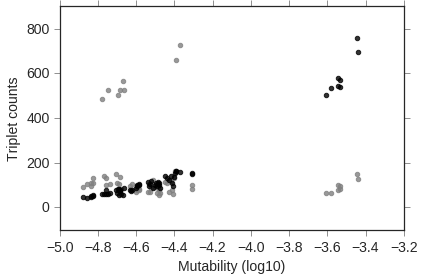

In [80]:
plt.scatter(muts_log10,triplet_into_centre,color = "grey" , label = "# times mutated into", alpha = 0.8)
plt.scatter(muts_log10,triplet_chosen_centre,color = "black", edgecolor = "black", label = "# times chosen", alpha = 0.8)
# plt.legend(loc = 2)
plt.xlabel("Mutability (log10)")
plt.ylabel("Triplet counts")
# plt.xlim(-5,-2.5)
# plt.ylim(0,1000)

#plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")

# # calc the trendline
# z = np.polyfit(muts_log10, triplet_chosen_centre, 1)
# p = np.poly1d(z)
# plt.plot(muts_log10,p(muts_log10),color = "black")

#font size 

SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize

plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("plots/Scatter_{t}_{l}Mbp_{p}propmuts_accurateINTO_genomeModel_log.png".format(p = prop_muts, l = str(dna_length/1000000), t = timestamp))

## ** loading in exported data to vidualize ** 

In [2]:
imported_data_df = pd.read_csv("data/Data_dataframes/DataDF_2020_12_17_16_00_40_0.1Mbp_6propmuts_accurateINTO_genomeModel.csv")

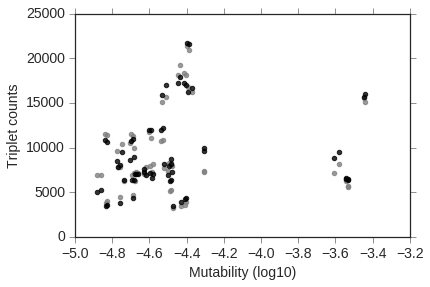

In [6]:
plt.scatter(imported_data_df.mutsLog10,imported_data_df.triplet_into_centre,color = "grey" , label = "# times mutated into", alpha = 0.8)
plt.scatter(imported_data_df.mutsLog10,imported_data_df.triplet_chosen_centre,color = "black", edgecolor = "black", label = "# times chosen", alpha = 0.8)
# plt.legend(loc = 2)
plt.xlabel("Mutability (log10)")
plt.ylabel("Triplet counts")
# plt.xlim(-5,-2.5)
# plt.ylim(0,1000)

#plt.errorbar(triplet_muts_intron, triplet_chnage_mean_intron, yerr = np.array(triplet_chnage_std_intron), ecolor = "grey", ls = "None")

# # calc the trendline
# z = np.polyfit(muts_log10, triplet_chosen_centre, 1)
# p = np.poly1d(z)
# plt.plot(muts_log10,p(muts_log10),color = "black")

#font size 

SMALL_SIZE = 10
MEDIUM_SIZE = 14
BIGGER_SIZE = 18
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize

plt.show()
# timestamp = datetime.now().strftime("%Y/%m/%d_%H:%M:%S").replace("/", "_").replace(":", "_")
# plt.tight_layout()
# plt.savefig("plots/Scatter_{t}_0.1Mbp_6propmuts_accurateINTO_genomeModel_log.png".format(t = timestamp))

# ** reegression ** 

In [26]:
x_muts_log10 = np.array(muts_log10).reshape((-1, 1))
y_triplet_chosen_centre = np.array(triplet_chosen_centre)


In [27]:
chosen_model= LinearRegression().fit(x_muts_log10, y_triplet_chosen_centre)


/usr/local/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [30]:
r_sq = chosen_model.score(x_muts_log10, y_triplet_chosen_centre)
slope = chosen_model.coef_
intercept = chosen_model.intercept_

In [31]:
print(r_sq, slope, intercept)

0.943730878937 [ 443.35647003] 2131.8125835
